In [1]:
import numpy as np
import pandas as pd
import uproot
from pylorentz import Momentum4
import matplotlib.pyplot as plt
%matplotlib inline
m_tau = 1.776

In [2]:
df = pd.read_pickle('../shared/df_tt_rho_rho.pkl')

In [3]:
df = df[(df['mva_dm_1'] == 1) & (df['mva_dm_2'] == 1) & (df["tau_decay_mode_1"] == 1) & (df["tau_decay_mode_2"] == 1)]

In [4]:
df.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,aco_angle_1,mva_dm_1,mva_dm_2,tau_decay_mode_1,tau_decay_mode_2,pi_E_1,...,metcov00,metcov01,metcov10,metcov11,gen_nu_p_1,gen_nu_phi_1,gen_nu_eta_1,gen_nu_p_2,gen_nu_phi_2,gen_nu_eta_2
entry,,,,,,,,,,,,,,,,,,,,,
8,1.228852,0.950417,0.223672,0.861532,2.657029,1,1,1,1,45.423448,...,42.660179,48.254131,48.254131,127.915657,11.907320,-1.878383,-0.443223,12.628682,1.261835,0.048225
25,0.124674,1.936855,1.318387,0.932849,1.547246,1,1,1,1,24.506373,...,161.991516,2.567861,2.567861,105.209160,14.349887,2.519850,-0.934011,44.844142,-0.313698,-1.423014
27,1.461517,0.400455,0.172710,0.132842,3.750274,1,1,1,1,15.319610,...,80.564423,-29.174086,-29.174086,72.426666,35.673293,0.106444,1.180579,23.342057,-2.873663,1.126849
45,0.059870,0.061072,0.111744,0.514073,1.192612,1,1,1,1,94.211361,...,45.858810,-4.467490,-4.467490,212.978531,2.964097,-0.686183,-1.008616,0.729467,2.953007,-0.809572
50,0.654131,0.931771,0.072470,0.504356,3.264792,1,1,1,1,25.899289,...,84.956879,27.219664,27.219664,33.637897,8.663849,-2.653995,-0.131161,27.029359,0.369547,-0.154201


In [16]:
pi_1 = Momentum4(df['pi_E_1'], df['pi_px_1'], df['pi_py_1'], df['pi_pz_1'])
pi_2 = Momentum4(df['pi_E_2'], df['pi_px_2'], df['pi_py_2'], df['pi_pz_2'])
pi0_1 = Momentum4(df['pi0_E_1'], df['pi0_px_1'], df['pi0_py_1'], df['pi0_pz_1'])
pi0_2 = Momentum4(df['pi0_E_2'], df['pi0_px_2'], df['pi0_py_2'], df['pi0_pz_2'])

In [136]:
p1 = pi_1
p2 = pi_2
p3 = pi0_1
p4 = pi0_2
rest_frame = pi_1+pi_2+pi0_1+pi0_2
boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])
p1 = p1.boost_particle(boost)
p2 = p2.boost_particle(boost)
p3 = p3.boost_particle(boost)
p4 = p4.boost_particle(boost)

# Some geometrical functions
def cross_product(vector3_1, vector3_2):
    return np.cross(vector3_1.T, vector3_2.T).T

def dot_product(vector1, vector2):
    return np.einsum('ij, ij->i', vector1.T, vector2.T)

def norm(vector):
    return np.sqrt((vector.T ** 2).sum(-1))[..., np.newaxis].T

# calculating the perpependicular component
pi0_1_3Mom_star_perp = cross_product(p1[1:], p3[1:])
pi0_2_3Mom_star_perp = cross_product(p2[1:], p4[1:])
# Now normalise:
pi0_1_3Mom_star_perp = pi0_1_3Mom_star_perp/norm(pi0_1_3Mom_star_perp)
pi0_2_3Mom_star_perp = pi0_2_3Mom_star_perp/norm(pi0_2_3Mom_star_perp)
# Calculating phi_star
phi_CP = np.arccos(dot_product(pi0_1_3Mom_star_perp, pi0_2_3Mom_star_perp))

In [109]:
phi_CP

array([0.48437372, 1.59424942, 0.60866791, ..., 1.28933097, 2.63131196,
       1.21207559])

In [121]:
p1 = pi_1
p2 = pi_2
p3 = pi0_1
p4 = pi0_2
rest_frame = pi_1+pi_2+pi0_1+pi0_2

boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])
p1_boosted = p1.boost_particle(boost)
p2_boosted = p2.boost_particle(boost)
p3_boosted = p3.boost_particle(boost)
p4_boosted = p4.boost_particle(boost)
p1_b_p = np.c_[p1_boosted.p_x, p1_boosted.p_y, p1_boosted.p_z]
p2_b_p = np.c_[p2_boosted.p_x, p2_boosted.p_y, p2_boosted.p_z]
p3_b_p = np.c_[p3_boosted.p_x, p3_boosted.p_y, p3_boosted.p_z]
p4_b_p = np.c_[p4_boosted.p_x, p4_boosted.p_y, p4_boosted.p_z]
n1 = p1_b_p - np.multiply(np.einsum('ij, ij->i', p1_b_p, normaliseVector(p3_b_p))[:, None], normaliseVector(p3_b_p))
n2 = p2_b_p - np.multiply(np.einsum('ij, ij->i', p2_b_p, normaliseVector(p4_b_p))[:, None], normaliseVector(p4_b_p))
n1 = normaliseVector(n1)
n2 = normaliseVector(n2)
# vectorised form of
# n1 = p1.Vect() - p1.Vect().Dot(p3.Vect().Unit())*p3.Vect().Unit();
# n2 = p2.Vect() - p2.Vect().Dot(p4.Vect().Unit())*p4.Vect().Unit();
aco_angle = np.arccos(np.einsum('ij, ij->i', n1, n2))

def normaliseVector(vec):
    """

    Normalises an array of vectors
    """
    return vec/np.sqrt((vec ** 2).sum(-1))[..., np.newaxis]

def dotRowOfVectors(vec1, vec2):
    return np.einsum('ij, ij->i', vec1, vec2)

In [120]:
np.array(aco_angle)

array([3.61897216, 4.6924002 , 3.72700124, ..., 4.40393606, 5.72403402,
       4.32747216])

In [115]:
np.einsum('ij, ij->i', p1_b_p, normaliseVector(p3_b_p))

array([38.78627605, 17.15501438,  8.51852755, ..., 48.04197876,
        1.96696487, 14.98627838])

In [52]:
np.einsum('ij, ij->i', p1_b_p, normaliseVector(p3_b_p))[:, None]

array([[ 8.55104912],
       [29.05548573],
       [37.54481643],
       ...,
       [ 2.68961678],
       [33.24603664],
       [13.17196788]])

In [128]:
pi_1_boosted = p1_boosted
pi_2_boosted = p2_boosted
pi0_1_boosted = p3_boosted
pi0_2_boosted = p4_boosted
y_1 = (pi_1_boosted.e - pi0_1_boosted.e)/(pi_1_boosted.e + pi0_1_boosted.e)
y_2 = (pi_2_boosted.e - pi0_2_boosted.e)/(pi_2_boosted.e + pi0_2_boosted.e)

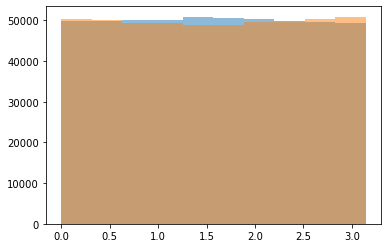

In [133]:
plt.hist(phi_CP[y_1*y_2<0],alpha=0.5)
plt.hist(phi_CP[y_1*y_2>0],alpha=0.5)
plt.show()

## testing rotations

In [5]:
pi_1 = Momentum4(df['pi_E_1'], df["pi_px_1"], df["pi_py_1"], df["pi_pz_1"])
pi_2 = Momentum4(df['pi_E_2'], df["pi_px_2"], df["pi_py_2"], df["pi_pz_2"])
pi0_1 = Momentum4(df['pi0_E_1'], df["pi0_px_1"], df["pi0_py_1"], df["pi0_pz_1"])
pi0_2 = Momentum4(df['pi0_E_2'], df["pi0_px_2"], df["pi0_py_2"], df["pi0_pz_2"])
rho_1 = pi_1 + pi0_1
rho_2 = pi_2 + pi0_2
# boost into rest frame of resonances
rest_frame = pi_1 + pi_2 + pi0_1 + pi0_2
boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])
pi_1_boosted = pi_1.boost_particle(boost)
pi_2_boosted = pi_2.boost_particle(boost)
pi0_1_boosted = pi0_1.boost_particle(boost)
pi0_2_boosted = pi0_2.boost_particle(boost)
rho_1_boosted = pi_1_boosted + pi0_1_boosted
rho_2_boosted = pi_2_boosted + pi0_2_boosted

In [6]:
rho_1_boosted.p

array([47.42022064, 46.25090776, 46.09697802, ..., 50.77851103,
       35.21913271, 28.18586738])

In [7]:
vec1 = rho_1_boosted[1:].T
vec2 = np.tile(np.array([0, 0, 1]), (len(vec1),1))

In [27]:
vec1.shape, vec2.shape

((998268, 3), (998268, 3))

In [42]:
rho_1_boosted.e.shape[0]

998268

In [32]:
vec1

array([[-13.6526224 , -43.56032036, -12.83673312],
       [-39.68447265,  20.78640418,  11.49845642],
       [ 45.14267381,   8.90718296,   2.78073299],
       ...,
       [-26.2174774 , -21.11066856,  38.0189523 ],
       [ -2.74607258, -33.03286019, -11.90279554],
       [ 18.45834459, -14.95493103, -15.16847629]])

In [31]:
np.linalg.norm(vec1, axis=1)

array([47.42022064, 46.25090776, 46.09697802, ..., 50.77851103,
       35.21913271, 28.18586738])

In [41]:
vec1 / np.linalg.norm(vec1, axis=1)[:,None]

array([[-0.28790719, -0.91860223, -0.27070167],
       [-0.85802581,  0.44942695,  0.24861039],
       [ 0.9792979 ,  0.19322705,  0.06032354],
       ...,
       [-0.51631048, -0.4157402 ,  0.74872129],
       [-0.07797105, -0.93792373, -0.3379639 ],
       [ 0.65487942, -0.53058261, -0.53815893]])

In [8]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
#     return np.eye(3), kmat, kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

def rotation_matrix_from_vectors_v(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = vec1 / np.linalg.norm(vec1, axis=1)[:,None], vec2 / np.linalg.norm(vec2, axis=1)[:,None]
    v = np.cross(a, b)
    c = np.einsum('ij, ij->i', a, b)
    s = np.linalg.norm(v, axis=1)
    kmat = np.array([[-np.zeros(len(vec1)), v.T[2], -v.T[1]], [-v.T[2], -np.zeros(len(vec1)), v.T[0]], [v.T[1], -v.T[0], -np.zeros(len(vec1))]]).T
#     return ((1 - c) / (s ** 2))
#     return 
    rotation_matrix = np.tile(np.eye(3), (len(vec1),1,1)) + kmat + np.linalg.matrix_power(kmat, 2)*((1 - c) / (s ** 2))[:,None][:,np.newaxis]
#     return np.tile(np.eye(3), (len(vec1),1,1)), kmat, np.linalg.matrix_power(kmat, 2)*((1 - c) / (s ** 2))[:,None][:,np.newaxis]
    return rotation_matrix

In [171]:
b = rotation_matrix_from_vectors_v(vec1, vec2)
for i in range(len(vec1)):
    a = rotation_matrix_from_vectors(vec1[i], vec2[i])
    j=1
#     print(a[j])
#     print(b[j][i])
    if not np.all(a[j]==b[j][i]):
        print('bad')
#     print('\n')

KeyboardInterrupt: 

In [181]:
b = rotation_matrix_from_vectors_v(vec1, vec2)
for i in range(len(vec1)):
    a = rotation_matrix_from_vectors(vec1[i], vec2[i])
    j=1
#     print(a[j])
#     print(b[j][i])
    if not np.allclose(a,b[i]):
        print(a)
        print(b[i])
        print(np.allclose(a,b[i]))
        print('\n')
    if i%100000 == 0:
        print(f'getting {i}')
#     print('\n')

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000


In [25]:
b = rotation_matrix_from_vectors_v(vec1, vec2)

In [144]:
a

array([[-0.15393397, -0.35627976,  0.92161221],
       [-0.35627976,  0.88999781,  0.28454989],
       [-0.92161221, -0.28454989, -0.26393616]])

In [145]:
b[0]

array([[ 0.88634205, -0.36263923, -0.28790719],
       [-0.36263923, -0.15704373, -0.91860223],
       [ 0.28790719,  0.91860223, -0.27070167]])

In [182]:
b

array([[[ 0.88634205, -0.36263923,  0.28790719],
        [-0.36263923, -0.15704373,  0.91860223],
        [-0.28790719, -0.91860223, -0.27070167]],

       [[ 0.41037789,  0.30883927,  0.85802581],
        [ 0.30883927,  0.8382325 , -0.44942695],
        [-0.85802581,  0.44942695,  0.24861039]],

       [[ 0.09553609, -0.17846142, -0.9792979 ],
        [-0.17846142,  0.96478745, -0.19322705],
        [ 0.9792979 ,  0.19322705,  0.06032354]],

       ...,

       [[ 0.84755918, -0.12274742,  0.51631048],
        [-0.12274742,  0.90116211,  0.4157402 ],
        [-0.51631048, -0.4157402 ,  0.74872129]],

       [[ 0.99081699, -0.1104636 ,  0.07797105],
        [-0.1104636 , -0.32878089,  0.93792373],
        [-0.07797105, -0.93792373, -0.3379639 ]],

       [[ 0.07139687,  0.75235326, -0.65487942],
        [ 0.75235326,  0.39044419,  0.53058261],
        [ 0.65487942, -0.53058261, -0.53815893]]])

In [190]:
b

array([[[ 0.88634205, -0.36263923,  0.28790719],
        [-0.36263923, -0.15704373,  0.91860223],
        [-0.28790719, -0.91860223, -0.27070167]],

       [[ 0.41037789,  0.30883927,  0.85802581],
        [ 0.30883927,  0.8382325 , -0.44942695],
        [-0.85802581,  0.44942695,  0.24861039]],

       [[ 0.09553609, -0.17846142, -0.9792979 ],
        [-0.17846142,  0.96478745, -0.19322705],
        [ 0.9792979 ,  0.19322705,  0.06032354]],

       ...,

       [[ 0.84755918, -0.12274742,  0.51631048],
        [-0.12274742,  0.90116211,  0.4157402 ],
        [-0.51631048, -0.4157402 ,  0.74872129]],

       [[ 0.99081699, -0.1104636 ,  0.07797105],
        [-0.1104636 , -0.32878089,  0.93792373],
        [-0.07797105, -0.93792373, -0.3379639 ]],

       [[ 0.07139687,  0.75235326, -0.65487942],
        [ 0.75235326,  0.39044419,  0.53058261],
        [ 0.65487942, -0.53058261, -0.53815893]]])

In [30]:
pi_1_boosted_rot_2 = np.einsum('ij,ikj->ik',pi_1_boosted[1:].T,b)

In [44]:
pi_1_boosted_rot, pi_2_boosted_rot = [], []
pi0_1_boosted_rot, pi0_2_boosted_rot = [], []
rho_1_boosted_rot, rho_2_boosted_rot = [], []
for i in range(pi_1_boosted[:].shape[1]):
    rot_mat = rotation_matrix_from_vectors(rho_1_boosted[1:, i], [0, 0, 1])
    pi_1_boosted_rot.append(rot_mat.dot(pi_1_boosted[1:, i]))
    pi0_1_boosted_rot.append(rot_mat.dot(pi0_1_boosted[1:, i]))
    pi_2_boosted_rot.append(rot_mat.dot(pi_2_boosted[1:, i]))
    pi0_2_boosted_rot.append(rot_mat.dot(pi0_2_boosted[1:, i]))
    rho_1_boosted_rot.append(rot_mat.dot(rho_1_boosted[1:, i]))
    rho_2_boosted_rot.append(rot_mat.dot(rho_2_boosted[1:, i]))
    if i % 100000 == 0:
        print('finished getting rotated 4-vector', i)

finished getting rotated 4-vector 0
finished getting rotated 4-vector 100000
finished getting rotated 4-vector 200000
finished getting rotated 4-vector 300000
finished getting rotated 4-vector 400000
finished getting rotated 4-vector 500000
finished getting rotated 4-vector 600000
finished getting rotated 4-vector 700000
finished getting rotated 4-vector 800000
finished getting rotated 4-vector 900000


In [47]:
rho_1_boosted_rot[0], pi_1_boosted_rot[0] + pi0_1_boosted_rot[0]

(array([-4.88498131e-15, -1.77635684e-14,  4.74202206e+01]),
 array([-5.77315973e-15, -1.59872116e-14,  4.74202206e+01]))

In [36]:
for i in range(100):
    print(pi_1_boosted_rot[i]==pi_1_boosted_rot_2[i])

[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]
